# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [107]:
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [108]:
superstore = "D:\\MLPemula\\Dataset_clustering.csv"
df = pd.read_csv(superstore, encoding="latin1")  
print("Dataset berhasil dimuat")

Dataset berhasil dimuat


In [109]:
print("\n5 baris pertama dataset:")
df.head()


5 baris pertama dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [110]:
# Struktur Data
print("UKURAN DATASET: ", df.shape )
print("\nSTRUKTUR DATA: ")
df.info()
print("\nSTATISTIK DESKRIPTIF : ")
df.describe()

UKURAN DATASET:  (9994, 21)

STRUKTUR DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales  

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [111]:
# Missing Value
print("\nMISSING VALUE:")
print(df.isnull().sum())

# Memeriksa duplikasi data
print("\nJUMLAH DUPLIKASI:", df.duplicated().sum())


MISSING VALUE:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

JUMLAH DUPLIKASI: 0


KOLOM KATEGORIKAL :
 ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']

DISTRIBUSI Order ID:
Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
Name: count, dtype: int64


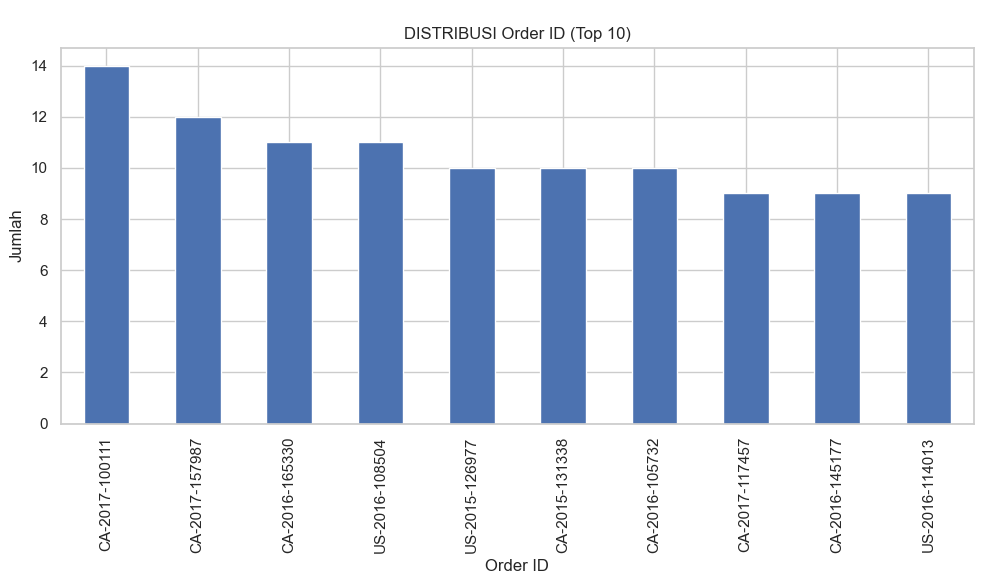


DISTRIBUSI Order Date:
Order Date
9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
Name: count, dtype: int64


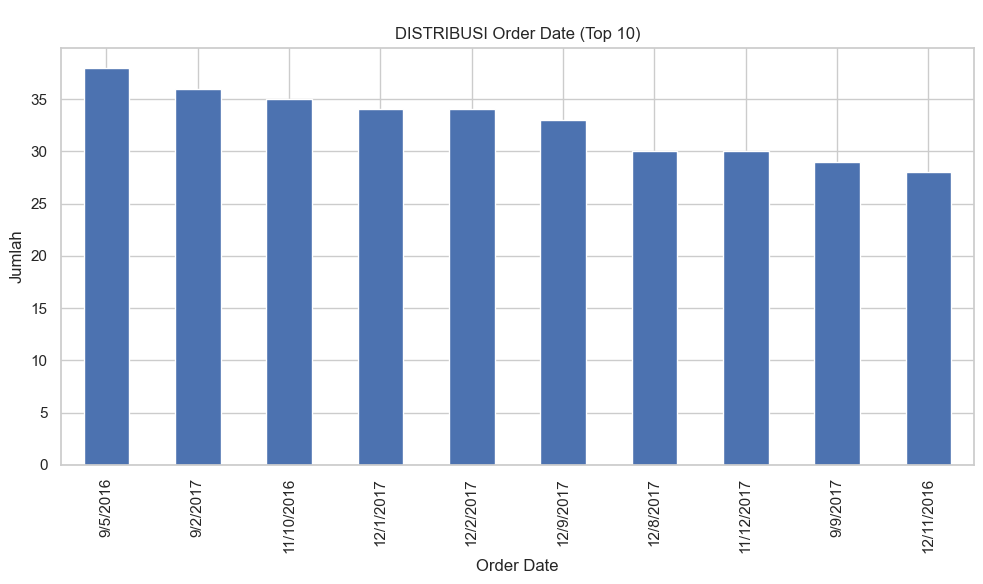


DISTRIBUSI Ship Date:
Ship Date
12/16/2015    35
9/26/2017     34
12/6/2017     32
11/21/2017    32
9/15/2017     30
Name: count, dtype: int64


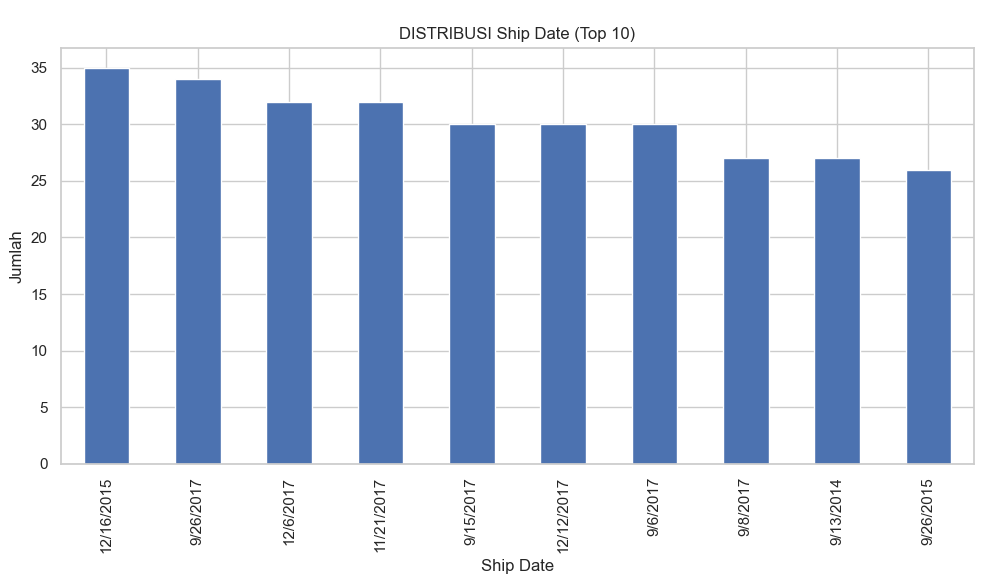


DISTRIBUSI Ship Mode:
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


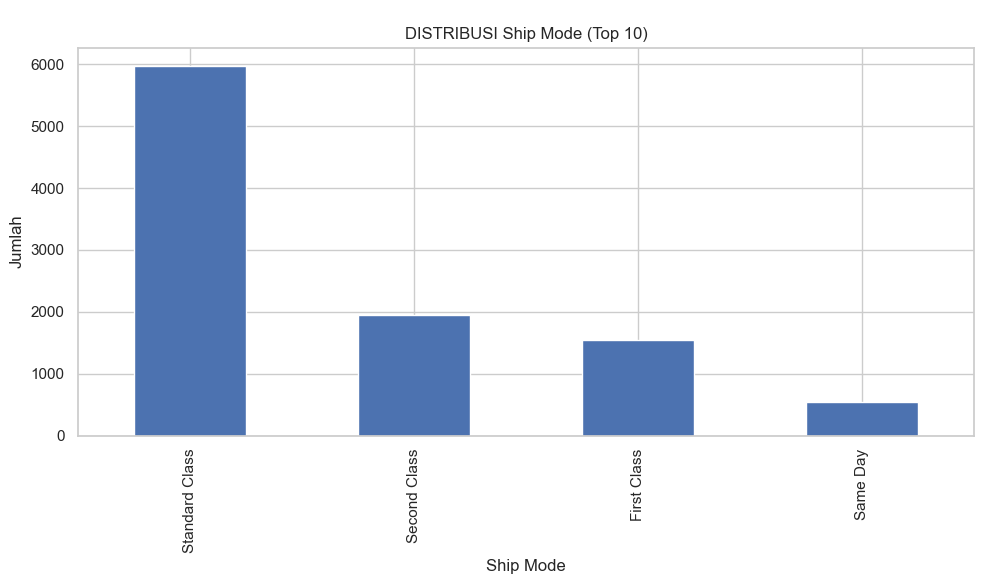


DISTRIBUSI Customer ID:
Customer ID
WB-21850    37
JL-15835    34
PP-18955    34
MA-17560    34
SV-20365    32
Name: count, dtype: int64


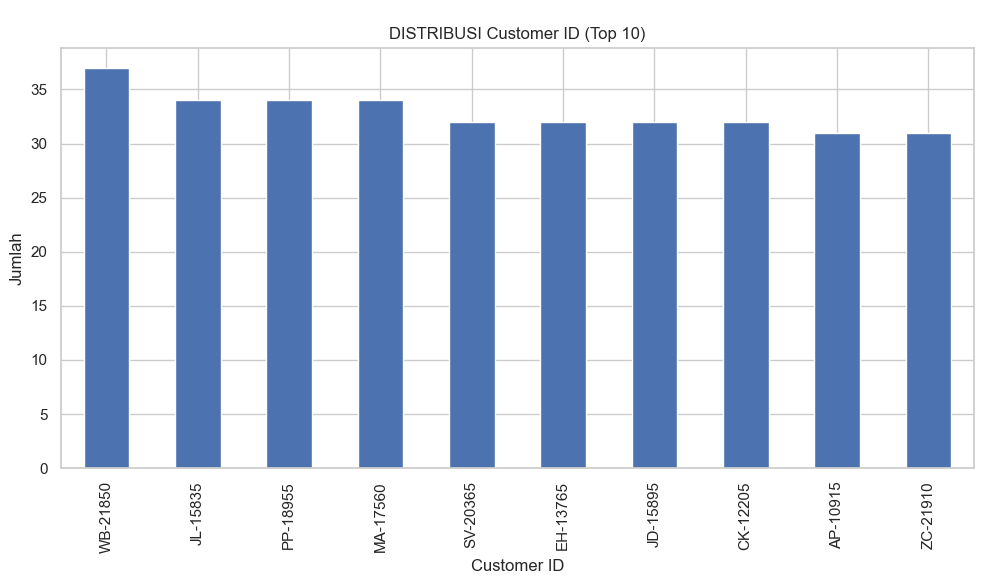


DISTRIBUSI Customer Name:
Customer Name
William Brown    37
John Lee         34
Paul Prost       34
Matt Abelman     34
Seth Vernon      32
Name: count, dtype: int64


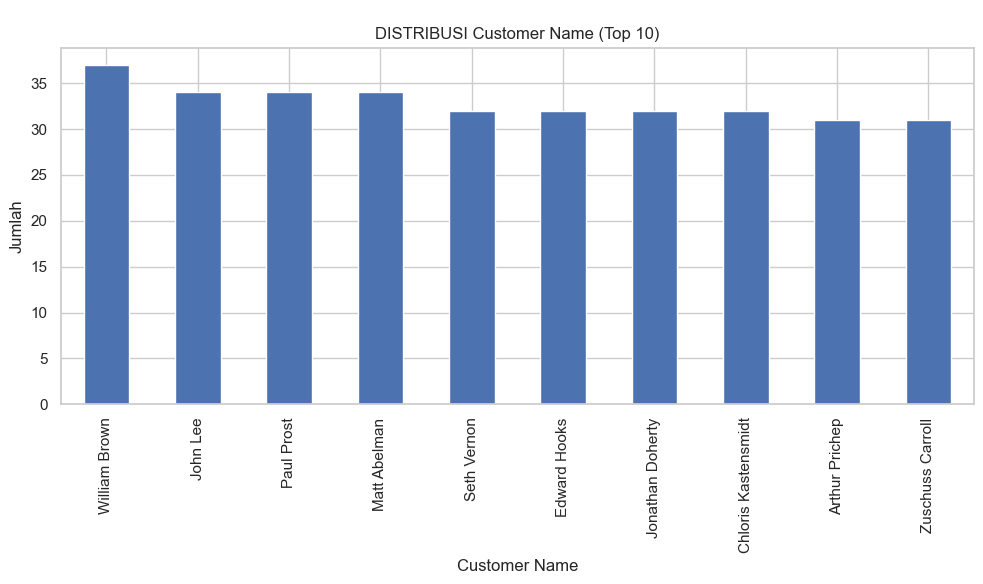


DISTRIBUSI Segment:
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


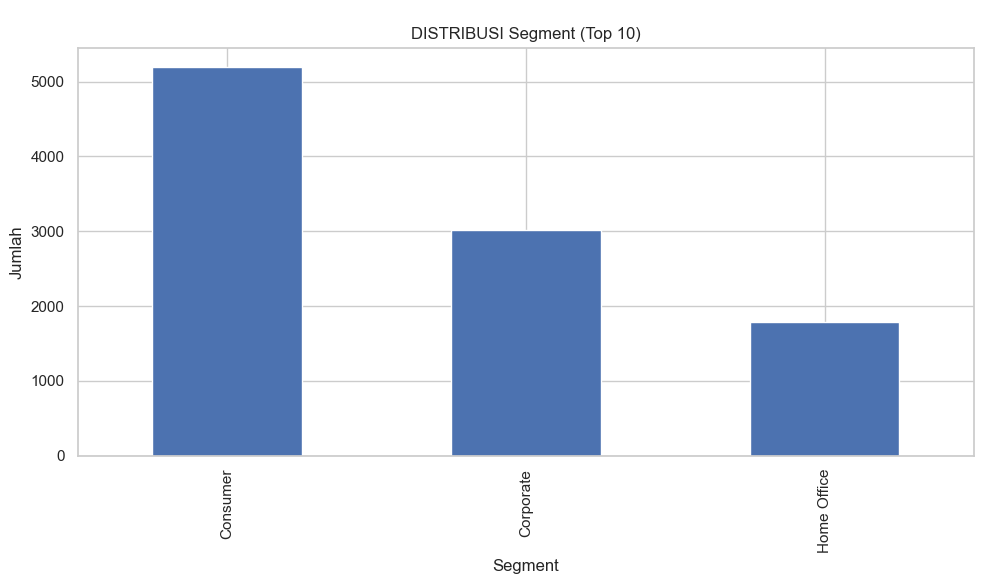


DISTRIBUSI Country:
Country
United States    9994
Name: count, dtype: int64


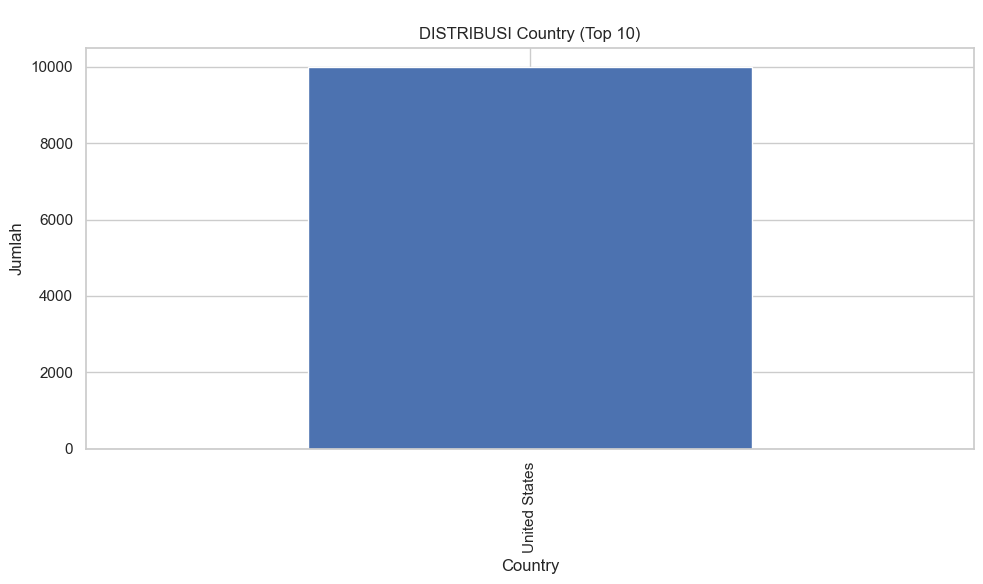


DISTRIBUSI City:
City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: count, dtype: int64


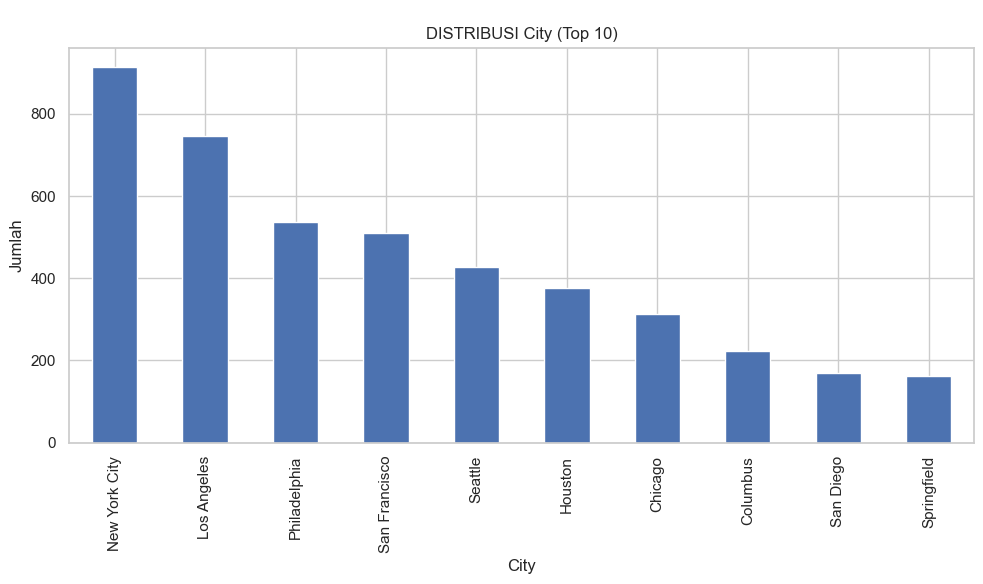


DISTRIBUSI State:
State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64


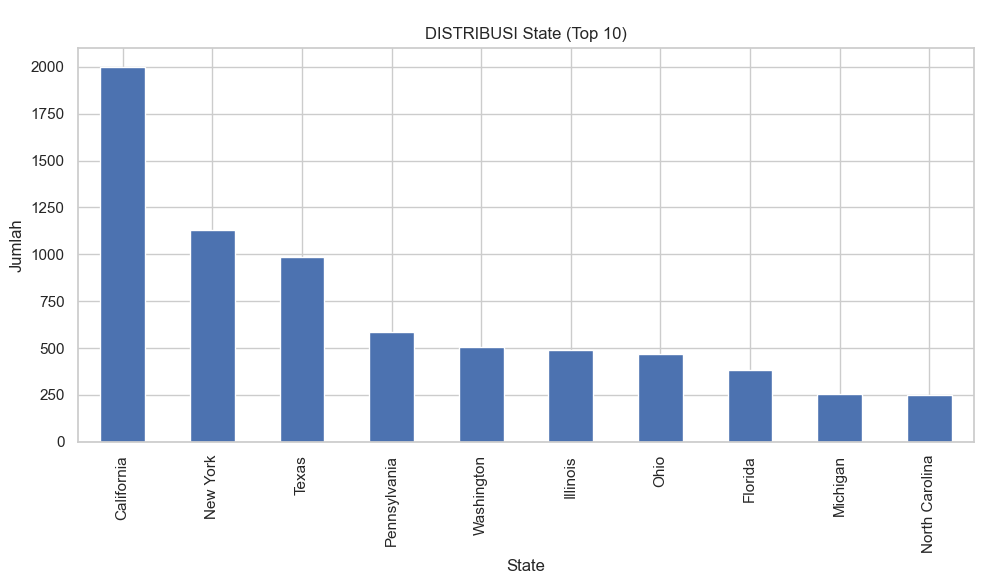


DISTRIBUSI Region:
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


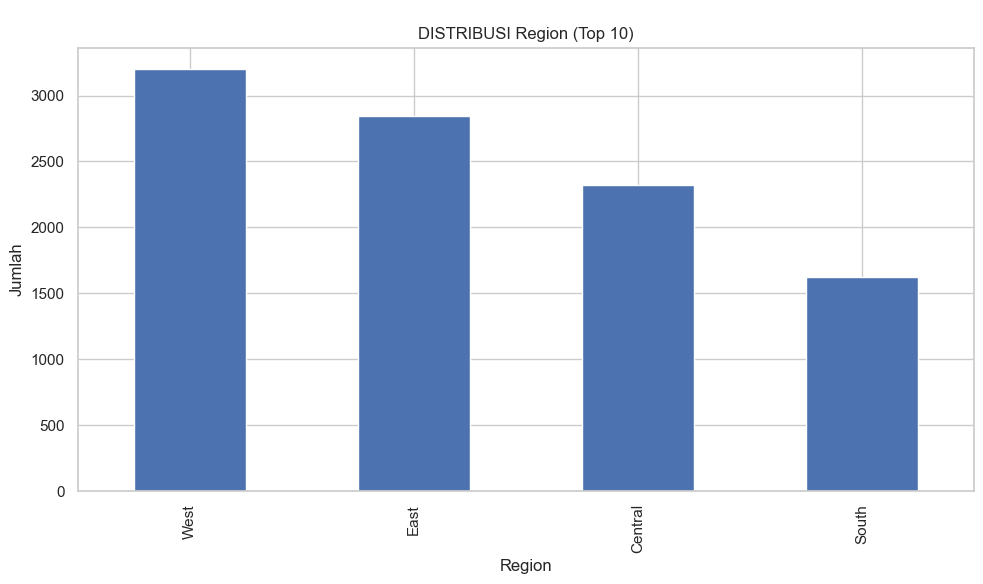


DISTRIBUSI Product ID:
Product ID
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10002647    15
TEC-AC-10003628    15
Name: count, dtype: int64


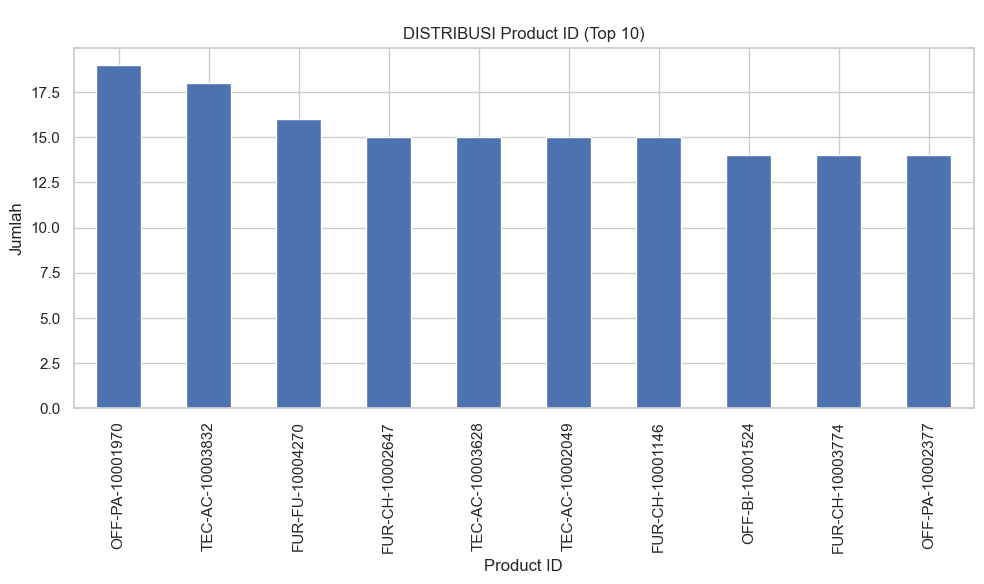


DISTRIBUSI Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


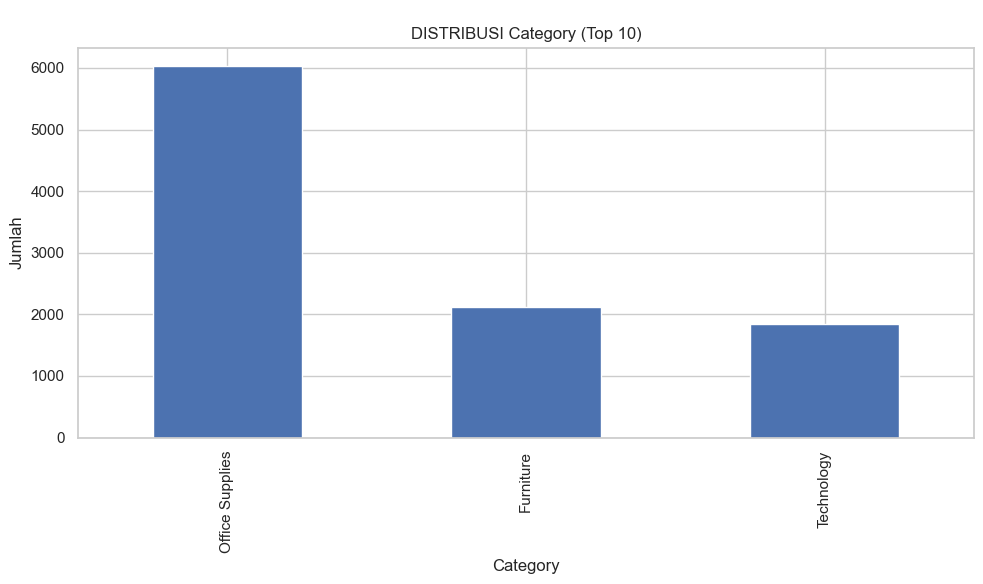


DISTRIBUSI Sub-Category:
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Name: count, dtype: int64


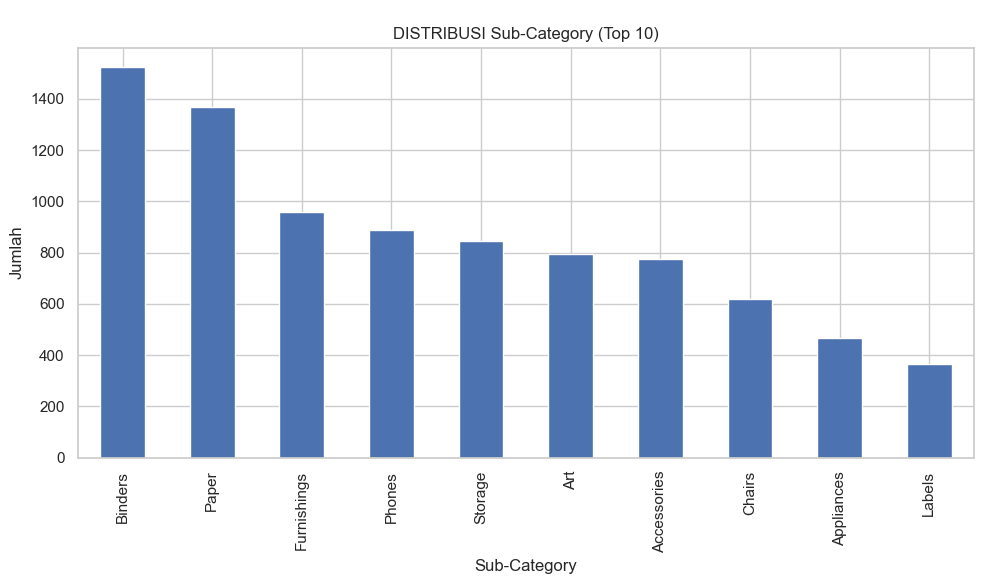


DISTRIBUSI Product Name:
Product Name
Staple envelope            48
Staples                    46
Easy-staple paper          46
Avery Non-Stick Binders    20
Staples in misc. colors    19
Name: count, dtype: int64


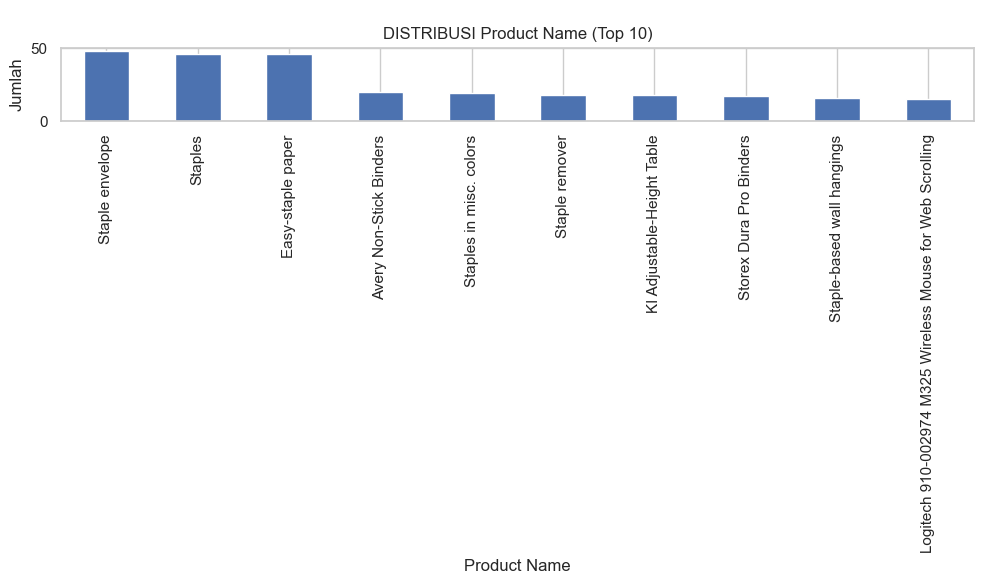

In [112]:
# Jenis data Kategorikal
kat_kol = df.select_dtypes(include=["object"]).columns.tolist()
print("KOLOM KATEGORIKAL :\n", kat_kol)

# nilai unik dalam setiap kolom kategorikal
for col in kat_kol:
    print(f"\nDISTRIBUSI {col}:")
    print(df[col].value_counts().head())
    plt.figure(figsize=(10, 6))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'\nDISTRIBUSI {col} (Top 10)')
    plt.ylabel('Jumlah')
    plt.tight_layout()
    plt.show()

Kolom Numerik: 
 ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


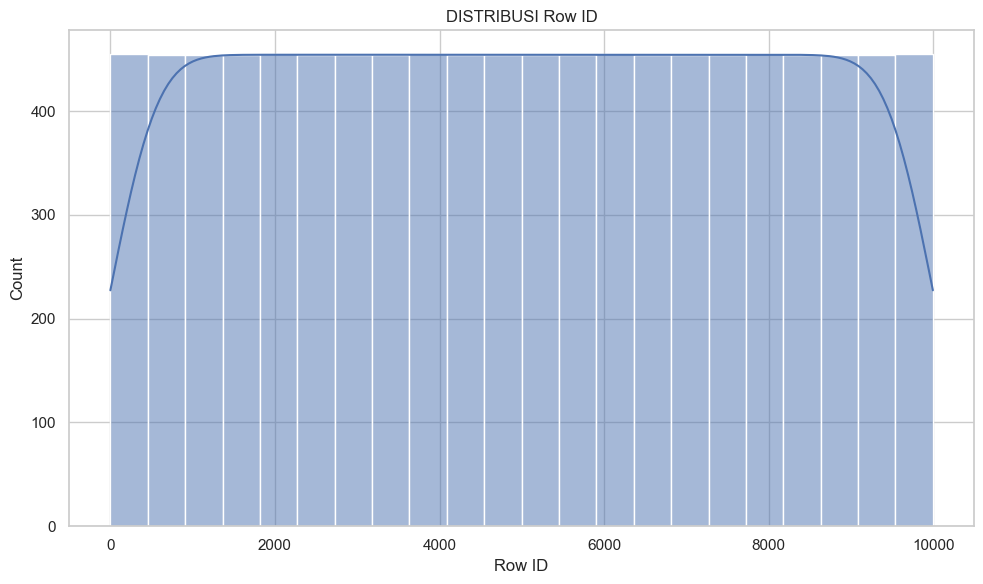

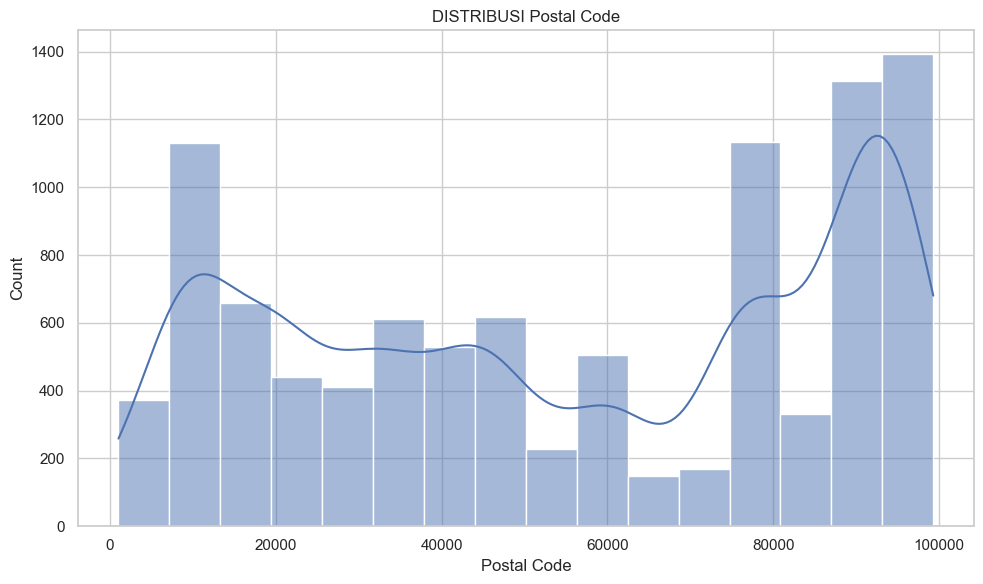

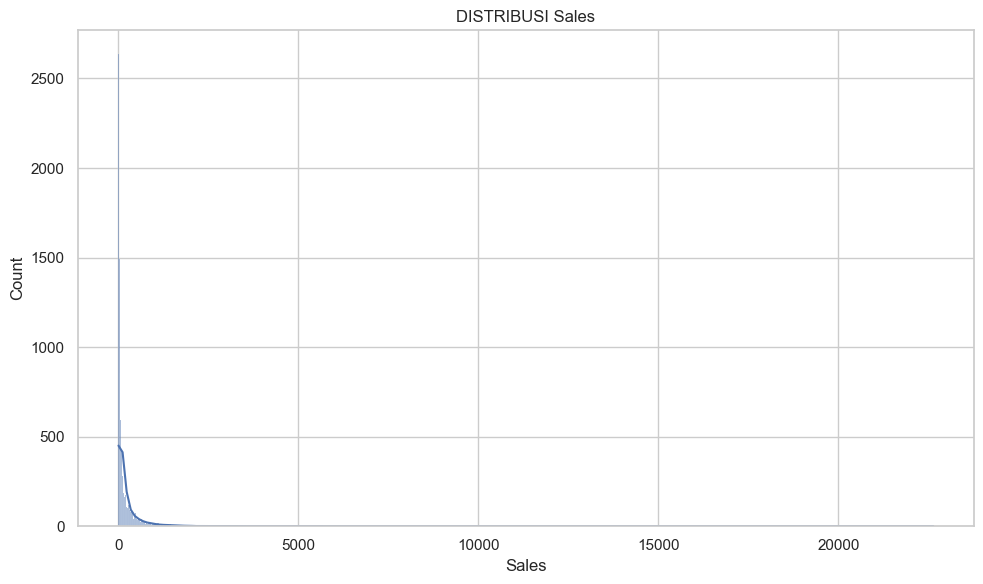

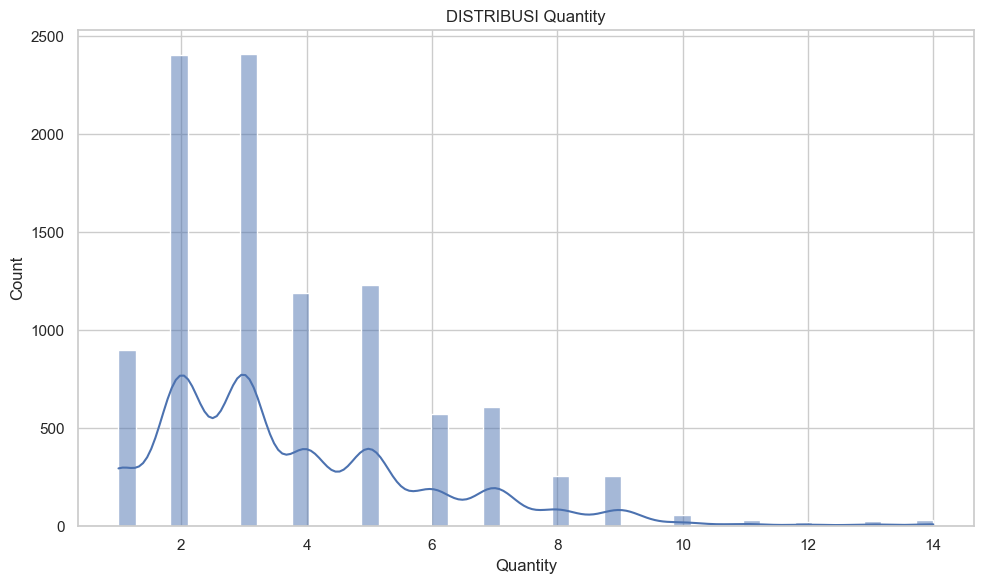

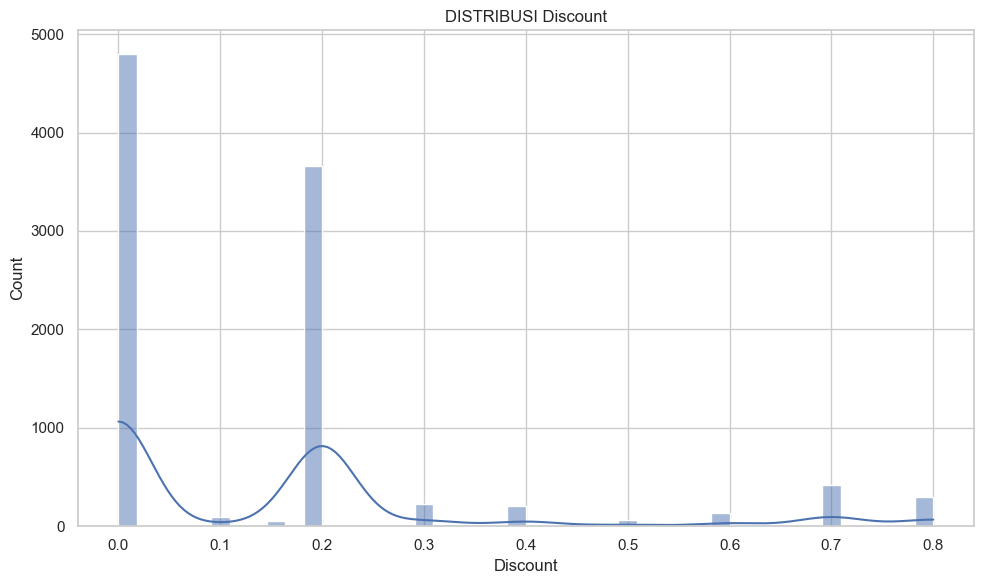

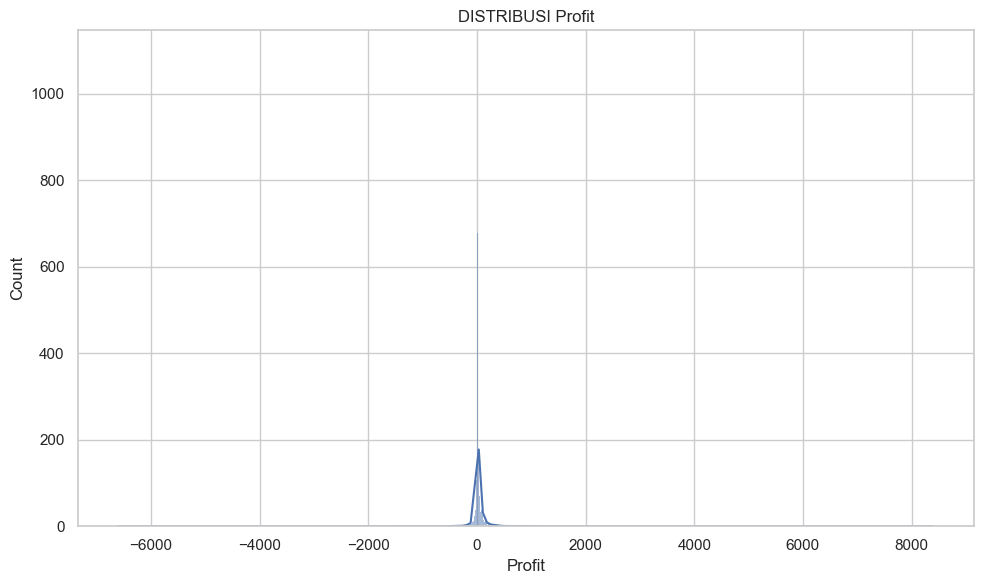

In [113]:
# Jenis data numerikal
num_kol = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Kolom Numerik: \n", num_kol)

for col in num_kol:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'DISTRIBUSI {col}')
    plt.tight_layout()
    plt.show()

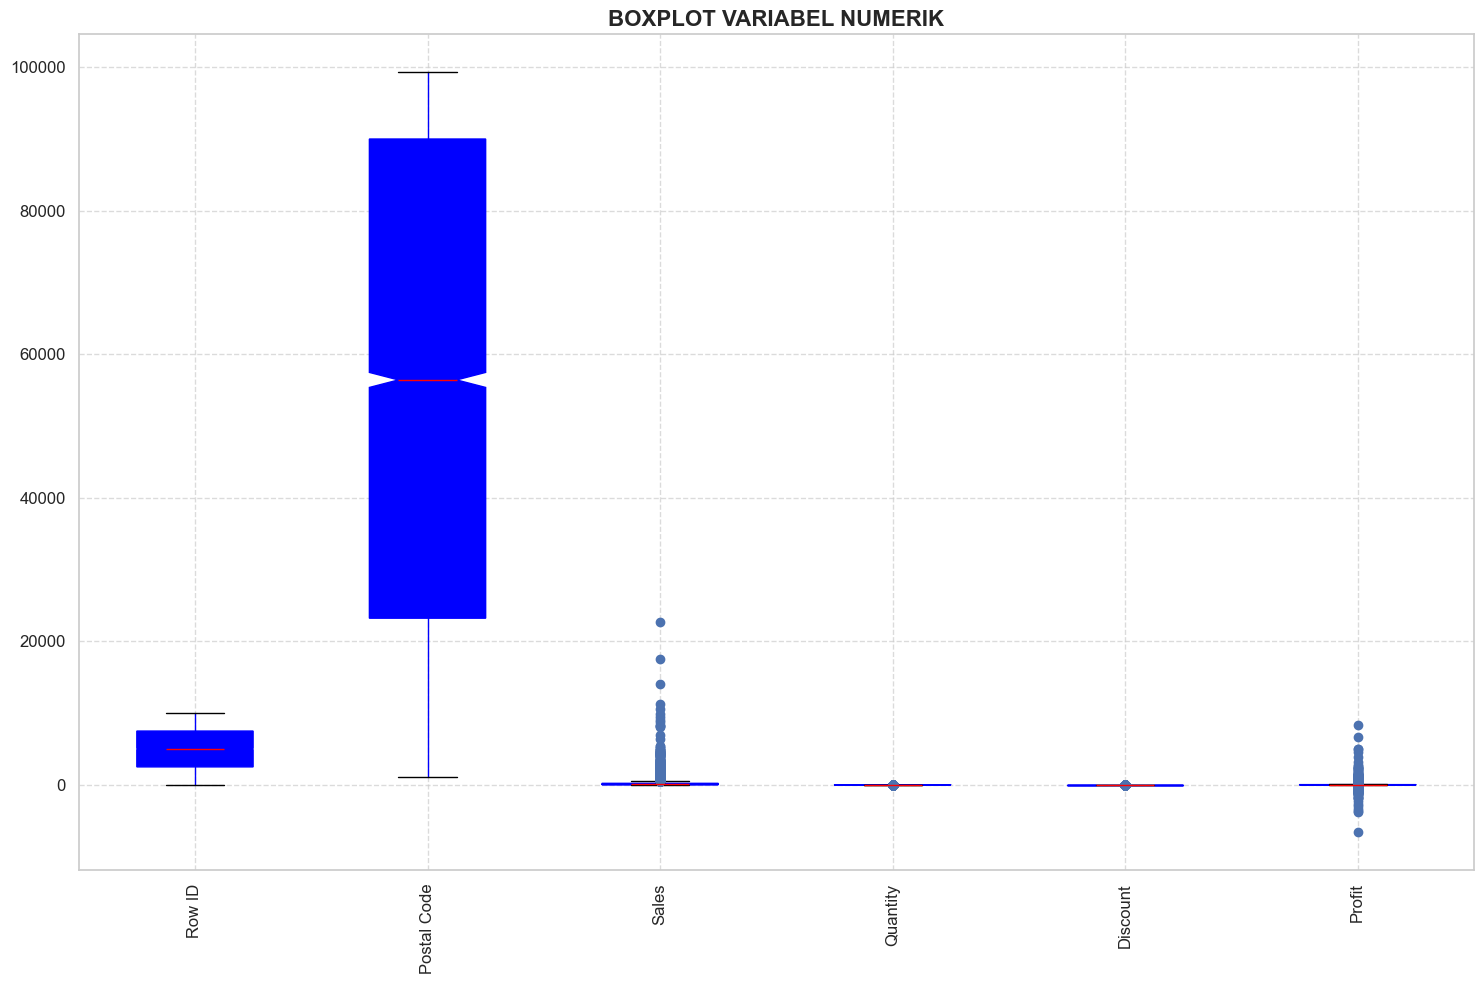

In [114]:
# Boxplot numerik buat outliters
plt.figure(figsize=(15, 10))
color = dict(boxes='Blue', whiskers='Blue', medians='Red', caps='Black')
df.boxplot(column=num_kol, color=color, sym='bo', notch=True, patch_artist=True)
plt.title('BOXPLOT VARIABEL NUMERIK', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

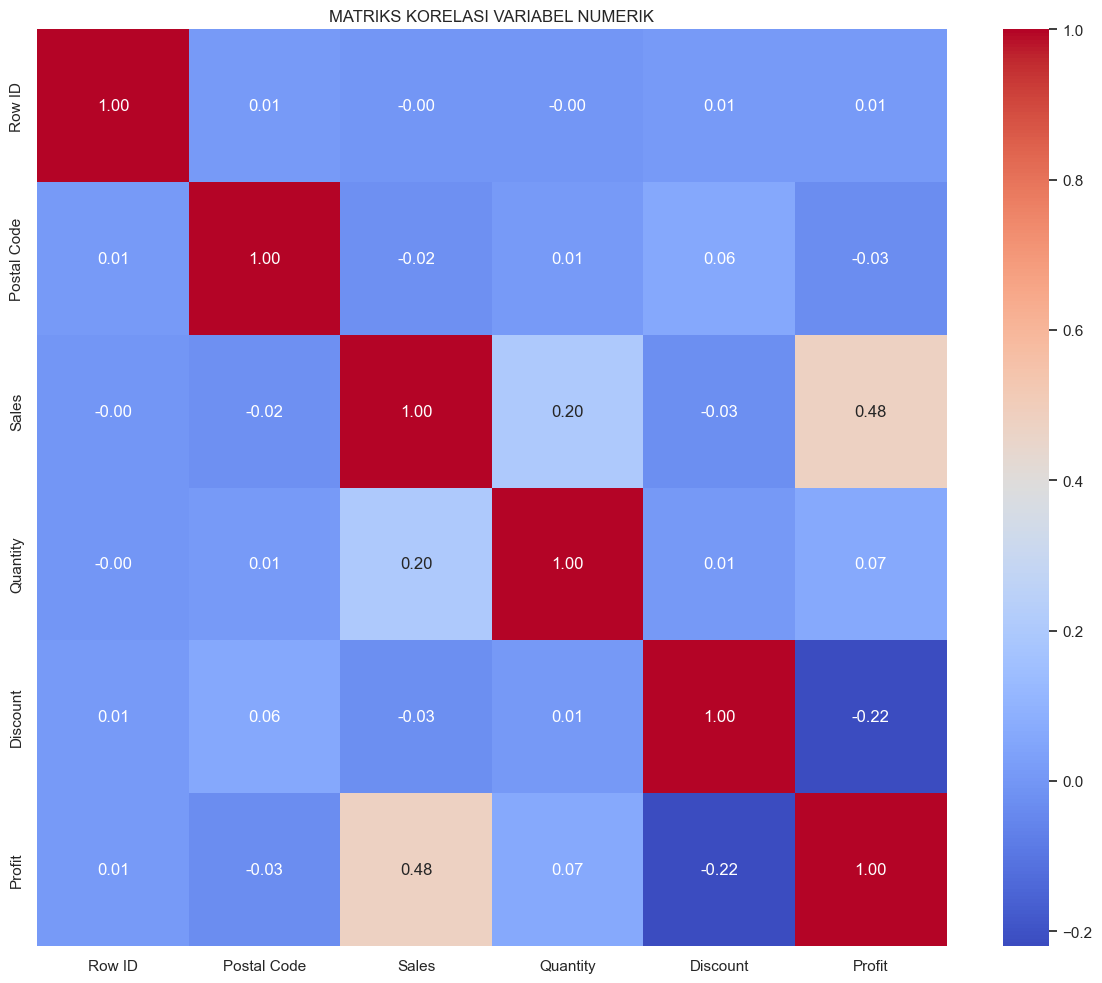

In [115]:
# Matriks korelasi untuk variabel numerik
plt.figure(figsize=(12, 10))
korel_matrix = df[num_kol].corr()
sns.heatmap(korel_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('MATRIKS KORELASI VARIABEL NUMERIK')
plt.tight_layout()
plt.show()

**Insight:**
- Dataset Superstore mempunyai 9994 baris dan 21 kolom
- Terdapat 3 kolom dengan tipe data float64 : Sales, Discount, dan Profit yang merupakan variabel numerik yang akan digunakan dalam analisis.
- Terdapat 3 kolom dengan tipe data int64: Row ID, Postal Code, dan Quantity. Row ID dan Postal Code tidak akan digunakan dalam analisis karena tidak memberikan informasi yang relevan untuk clustering. 
- Terdapat 15 kolom dengan tipe data object yang merepresentasikan variabel kategorikal seperti Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Region, Product ID, Category, Sub-Category, dan Product Name. Beberapa dari kolom ini seperti Category, Sub-Category, Region, dan Segment akan digunakan dalam analisis.
- Dataset ini tidak mempunyaki nilai yang hilang dan duplikasi data, jadi tidak perlu melakukan penanganan untuk missing value dan duplikasi.
- Terdapat beberapa kolom kategorikal yang nantinya digunakan dalam analisis :  Category, Sub-Category, Region, dan Segment.
- Distribusi dari masing-masing kolom kategorikal ditampilkan dalam bentuk bar plot untuk melihat frekuensi setiap kategori.
- Terdapat 4 kolom numerik yang akan digunakan dalam analisis, yaitu Sales, Quantity, Discount, dan Profit.
- Histogram dan boxplot dari masing-masing kolom numerik menunjukkan distribusi dan adanya outlier pada data
- Matriks korelasi antar variabel numerik menunjukkan korelasi positif yang kuat antara Sales dan Profit, serta Quantity dan Sales.
- Discount memiliki korelasi negatif dengan Profit.



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [116]:
# pilih fitur numerik
x_num = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# pilih fitur kategorikal
X_kat = df[['Category', 'Sub-Category', 'Region', 'Segment']]

print("Fitur numerik yang dipilih     :", x_num.columns.tolist())
print("Fitur kategorikal yang dipilih :", X_kat.columns.tolist())

Fitur numerik yang dipilih     : ['Sales', 'Quantity', 'Discount', 'Profit']
Fitur kategorikal yang dipilih : ['Category', 'Sub-Category', 'Region', 'Segment']


In [117]:
print("MISSING VALUES PADA FITUR NUMERIK:")
print(x_num.isnull().sum())

print("\nMISSING VALUES PADA FITUR KATEGORIKAL:")
print(X_kat.isnull().sum())

MISSING VALUES PADA FITUR NUMERIK:
Sales       0
Quantity    0
Discount    0
Profit      0
dtype: int64

MISSING VALUES PADA FITUR KATEGORIKAL:
Category        0
Sub-Category    0
Region          0
Segment         0
dtype: int64


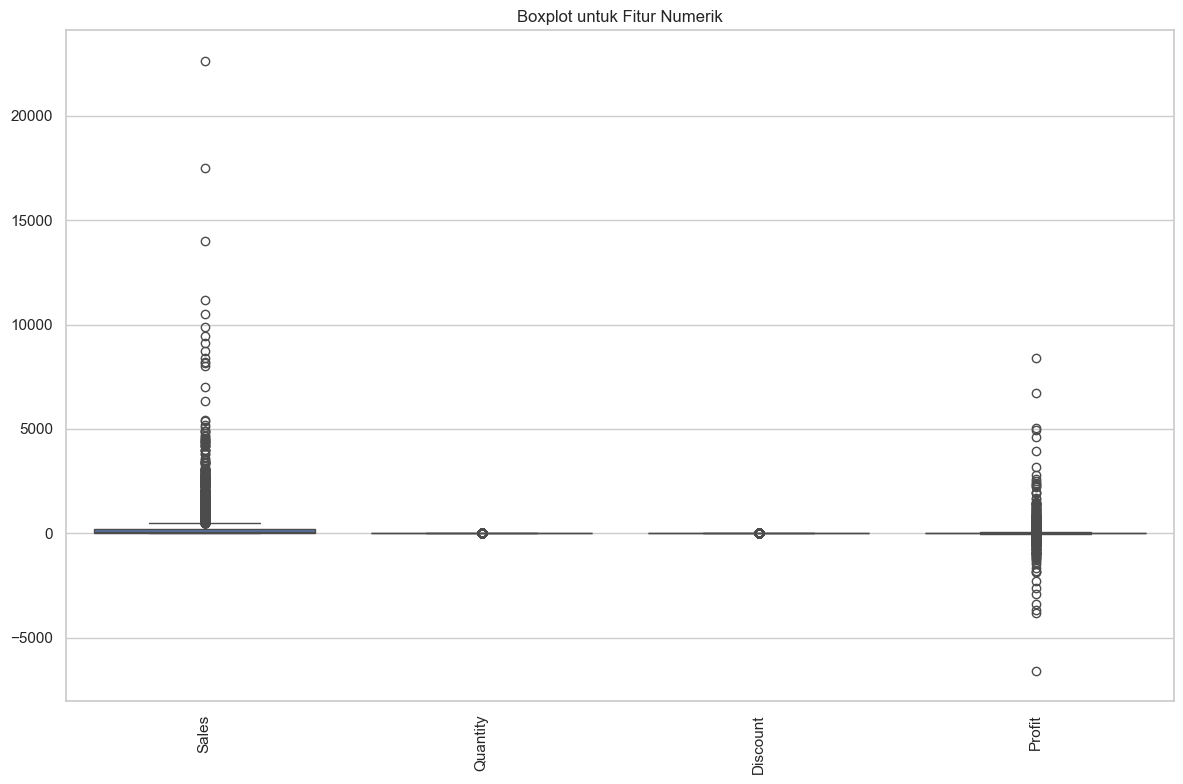

In [118]:
# lihat outlier  dengan boxplot 
plt.figure(figsize=(12, 8))
sns.boxplot(data=x_num)
plt.title('Boxplot untuk Fitur Numerik')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [119]:
def handle_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    
    return df_clean

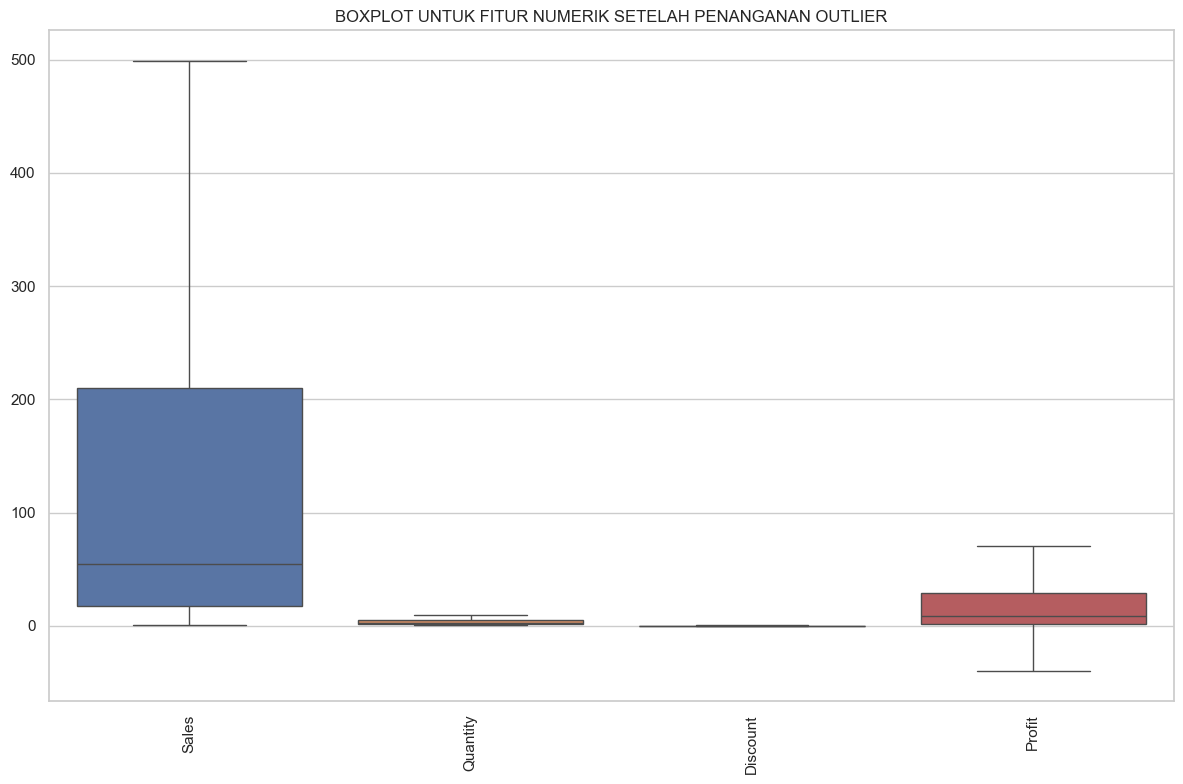

In [120]:
# tangani outlier pda fitur numerik
X_num_clean = handle_outliers(x_num, x_num.columns)

# lihat  boxplot setelah penanganan outlier
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_num_clean)
plt.title('BOXPLOT UNTUK FITUR NUMERIK SETELAH PENANGANAN OUTLIER')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [121]:
label_encoders = {}
X_kat_encoded = X_kat.copy()

for col in X_kat.columns:
    le = LabelEncoder()
    X_kat_encoded[col] = le.fit_transform(X_kat[col])
    label_encoders[col] = le

# lihat hasil encoding
print("DATA KATEGORIKAL SETELAH ENCODING :")
X_kat_encoded.head()

DATA KATEGORIKAL SETELAH ENCODING :


,Category,Sub-Category,Region,Segment
0,0,4,2,0
1,0,5,2,0
2,1,10,3,1
3,0,16,2,0
4,1,14,2,0


In [122]:
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num_clean),
    columns=X_num_clean.columns
)

# lihat hasil normalisasi
print("DATA NUMERIK SETELAH NORMALISASI : ")
X_num_clean.head()

DATA NUMERIK SETELAH NORMALISASI : 


,Sales,Quantity,Discount,Profit
0,261.960,2.0,0.00,41.913600
1,498.930,3.0,0.00,70.816875
2,14.620,2.0,0.00,6.871400
3,498.930,5.0,0.45,-39.724125
4,22.368,2.0,0.20,2.516400


In [123]:
X_proses = pd.concat([X_num_scaled, X_kat_encoded], axis=1)

print("DATA YANG SUDAH DIPROSES")
X_proses.head()

DATA YANG SUDAH DIPROSES


,Sales,Quantity,Discount,Profit,Category,Sub-Category,Region,Segment
0,0.720864,-0.833956,-0.871754,0.876567,0,4,2,0
1,2.124750,-0.358321,-0.871754,1.856837,0,5,2,0
2,-0.744456,-0.833956,-0.871754,-0.311908,1,10,3,1
3,2.124750,0.592950,1.982266,-1.892220,0,16,2,0
4,-0.698555,-0.833956,0.396699,-0.459610,1,14,2,0


**Insight:**
- Terpilih 7 fitur yang relevan untuk clustering : 2 fitur kategorikal dan 5 fitur numerik
- Tidak ada nilai yang kosong sehingga tidak perlu ditangani
- fitur kategorikal sudah diubah jadi nilai numerik dengan tabel Label Encoding
- fitur numerik sudah distandarisasi untuk hilangin efek skala yang berbeda
- data sudah siap buat di proses lebih lanjut untuk clustering

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [124]:
def find_optimal_clusters(data, max_k=10):
    sil_skors = []
    inertias = []
    
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        
        labels = kmeans.labels_
        sil_skore = silhouette_score(data, labels)
        sil_skors.append(sil_skore)
        
        inertias.append(kmeans.inertia_)
        
        print(f"JUMLAH CLUSTER : {k}, SILHOUETTE SCORE: {sil_skore:.4f}, INERTIA: {kmeans.inertia_:.2f}")
    
    return sil_skors, inertias

sil_kors, inertias = find_optimal_clusters(X_proses, max_k=10)

JUMLAH CLUSTER : 2, SILHOUETTE SCORE: 0.5466, INERTIA: 104307.85
JUMLAH CLUSTER : 3, SILHOUETTE SCORE: 0.3772, INERTIA: 81008.05
JUMLAH CLUSTER : 4, SILHOUETTE SCORE: 0.2838, INERTIA: 71778.22
JUMLAH CLUSTER : 5, SILHOUETTE SCORE: 0.2822, INERTIA: 65999.57
JUMLAH CLUSTER : 6, SILHOUETTE SCORE: 0.2111, INERTIA: 60613.20
JUMLAH CLUSTER : 7, SILHOUETTE SCORE: 0.2259, INERTIA: 56498.19
JUMLAH CLUSTER : 8, SILHOUETTE SCORE: 0.2331, INERTIA: 52483.49
JUMLAH CLUSTER : 9, SILHOUETTE SCORE: 0.2297, INERTIA: 49774.26
JUMLAH CLUSTER : 10, SILHOUETTE SCORE: 0.2122, INERTIA: 47708.78


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

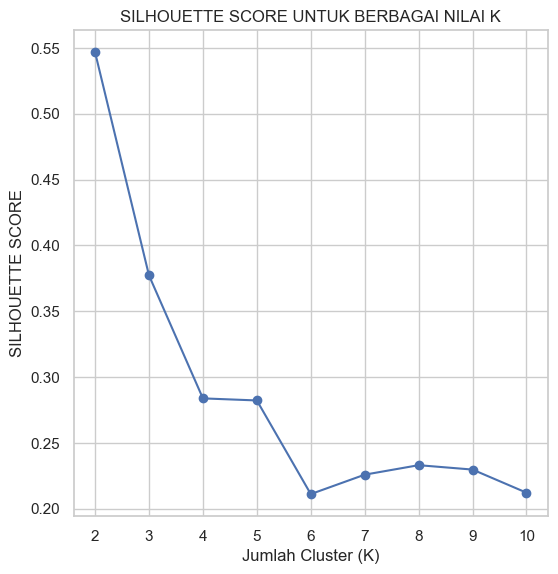

In [125]:
# plot silhouette
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sil_kors, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('SILHOUETTE SCORE')
plt.title('SILHOUETTE SCORE UNTUK BERBAGAI NILAI K')
plt.grid(True)

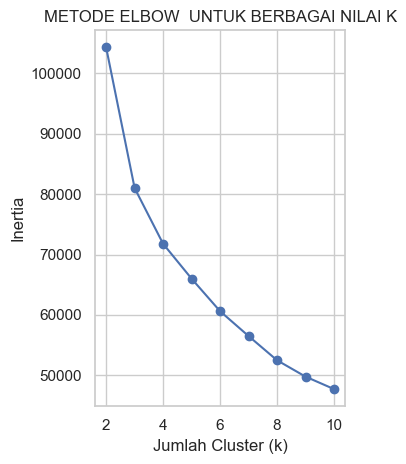

In [126]:
# plot elbow 
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('METODE ELBOW  UNTUK BERBAGAI NILAI K')
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
# milih jumlah cluster optimal 
opti_k = 5
# latih modelnya
final_model = KMeans(n_clusters=opti_k, random_state=42, n_init=10)
final_model.fit(X_proses)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [128]:
cluster_lab = final_model.labels_

# hitung silhoute score buat model final
sil_avg = silhouette_score(X_proses, cluster_lab)
print(f"SILHOUETTE SCORE UNTUK MODEL DENGAN {opti_k} CLUSTER: {sil_avg:.4f}")


SILHOUETTE SCORE UNTUK MODEL DENGAN 5 CLUSTER: 0.2822


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [129]:
k_fitur = 5

# pake cluster label buat target
selektor = SelectKBest(f_classif, k=k_fitur)
X_pilihan = selektor.fit_transform(X_proses, cluster_lab)

# cari index fitur 
pil_indices = selektor.get_support(indices=True)
pil_fitur = X_proses.columns[pil_indices]

print("FITUR YANG DIPILIH:", pil_fitur.tolist())


FITUR YANG DIPILIH: ['Sales', 'Discount', 'Profit', 'Category', 'Sub-Category']


In [130]:
# latih model 
model_pil = KMeans(n_clusters=opti_k, random_state=42, n_init=10)
model_pil.fit(X_pilihan)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [131]:
# cari label cluster
cluster_labels_pil = model_pil.labels_

# hitung silhouette score buat model dengan fitur terpilih
sil_avg_pill = silhouette_score(X_pilihan, cluster_labels_pil)
print(f"SILHOUETTE SCORE BUAT MODEL PAKAI FITUR TERPILIH: {sil_avg_pill:.4f}")

SILHOUETTE SCORE BUAT MODEL PAKAI FITUR TERPILIH: 0.4167


In [132]:
# bandingin hasil sebelum dan sesudah
print("\nPERBANDINGAN HASIL CLUSTERING:")
print(f"SEBELUM FEATURE SELECTION- SILHOUETTE SCORE: {sil_avg:.4f}")
print(f"SEBELUM FEATURE SELECTION- SILHOUETTE SCORE: {sil_avg_pill:.4f}")


PERBANDINGAN HASIL CLUSTERING:
SEBELUM FEATURE SELECTION- SILHOUETTE SCORE: 0.2822
SEBELUM FEATURE SELECTION- SILHOUETTE SCORE: 0.4167


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [133]:
# tambah label cluster ke dataset awak
df['Cluster'] = cluster_lab

In [134]:
# pake PCA buat visualisasi hasil clustering dalam 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_proses)

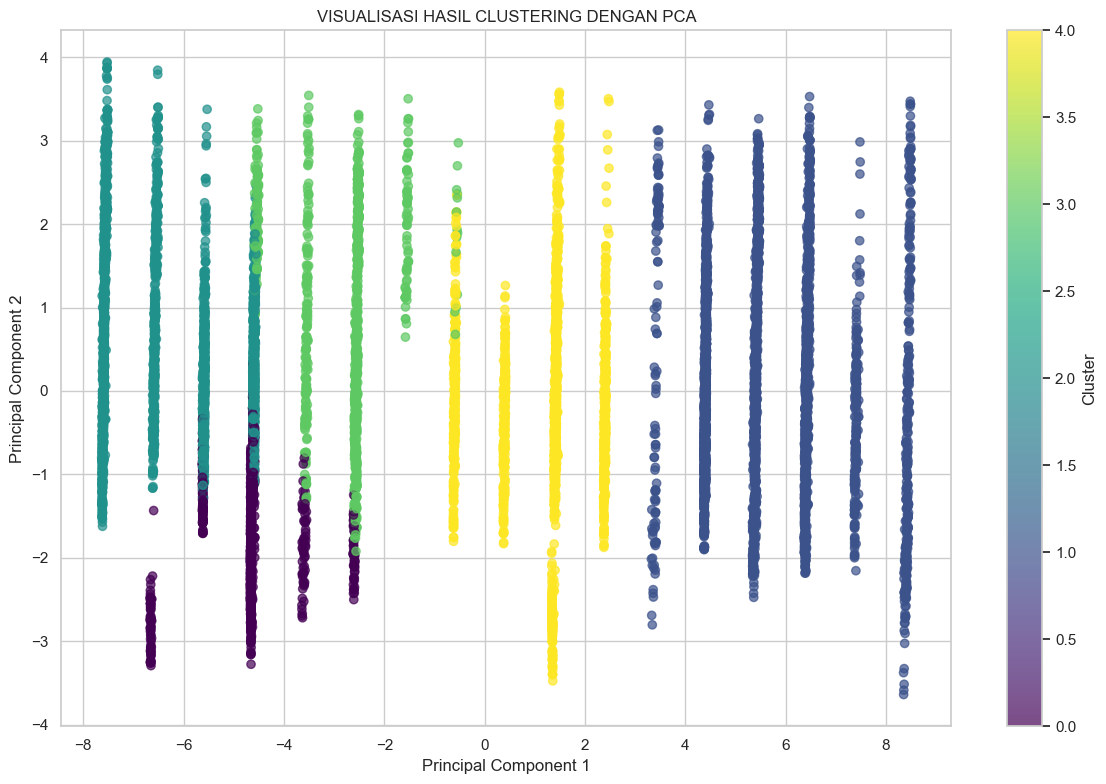

In [135]:
# plot hasil clustering dgn PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_lab, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('VISUALISASI HASIL CLUSTERING DENGAN PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

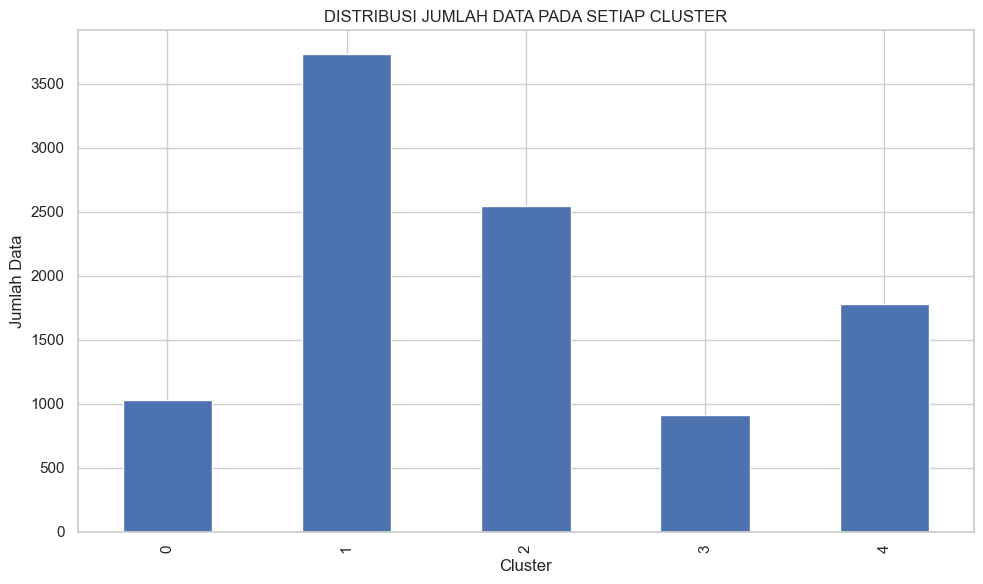

In [136]:
# visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
cluster_hitung = df['Cluster'].value_counts().sort_index()
cluster_hitung.plot(kind='bar')
plt.title('DISTRIBUSI JUMLAH DATA PADA SETIAP CLUSTER')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [137]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [138]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [139]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.